#Loading Data

In [1]:
#importing libraries

import matplotlib
import matplotlib.pyplot as plt
import random

import pandas as pd
import numpy as np

from tqdm import tqdm

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split

In [2]:
#!curl --header 'Host: doc-08-3c-docs.googleusercontent.com' --user-agent 'Mozilla/5.0 (X11; Linux x86_64; rv:81.0) Gecko/20100101 Firefox/81.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --cookie 'AUTH_f2a3s1o42b8g35crk5oc04dket414mml_nonce=iqueej7g0i4su' --header 'Upgrade-Insecure-Requests: 1' 'https://doc-08-3c-docs.googleusercontent.com/docs/securesc/iag7nsppr0gd9sfg3kf3nt5k7klifi6v/fdikafl9r8klpgkud6a75keauc7nhk3h/1601209575000/00584139903400704852/00584139903400704852/1QSwIHxbn-DhInBQ9Q3CYV0W9VyeviEUO?e=download&authuser=0&nonce=iqueej7g0i4su&user=00584139903400704852&hash=dkg5igrmn1a31quictga0dkehrhdgr62' --output 'falls.zip'
#!unzip /content/falls.zip
#!pip install seaborn --upgrade
import seaborn as sns

print(sns.__version__)

0.11.0


In [3]:
df = pd.read_csv("/content/falls/equip_failures_training_set.csv")

df.head()

,id,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,...,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,0,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,...,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,2,0,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,...,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,3,0,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,...,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,4,0,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,...,0,2578,76,62,0,0,0,0,0,0,0,0,232,0,0,2014,370,48,18,15740,1822,20174,44,0,0,0,1.08,54,5670,1566,240,46,58,44,10,0,0,0,4,32
4,5,0,60874,na,1368,458,0,0,0,0,0,0,43752,1966618,1800340,131646,4588,0,1974038,0,226,0,0,0,3230626,2618878,1058136,551022,0,0,0,0,1788,642,0,0,0,0,42124,372236,...,0,3590004,2026,444,0,0,0,0,0,0,0,0,44946,62648,11506,0,0,149474,35154,457040,80482,98334,27588,0,0,21173050,1116.06,1176,404740,904230,622012,229790,405298,347188,286954,311560,433954,1218,0,0


#Make dataset interpretable to machine

###Replace na with np.nan

In [4]:
"""Instead of nan value we have na, so we will replace na with np.nan"""

df = df.replace('na', np.NaN)
df.head()

,id,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,...,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,0,76698,NaN,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,...,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,2,0,33058,NaN,0,NaN,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,...,NaN,NaN,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,3,0,41040,NaN,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,...,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,4,0,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,...,0,2578,76,62,0,0,0,0,0,0,0,0,232,0,0,2014,370,48,18,15740,1822,20174,44,0,0,0,1.08,54,5670,1566,240,46,58,44,10,0,0,0,4,32
4,5,0,60874,NaN,1368,458,0,0,0,0,0,0,43752,1966618,1800340,131646,4588,0,1974038,0,226,0,0,0,3230626,2618878,1058136,551022,0,0,0,0,1788,642,0,0,0,0,42124,372236,...,0,3590004,2026,444,0,0,0,0,0,0,0,0,44946,62648,11506,0,0,149474,35154,457040,80482,98334,27588,0,0,21173050,1116.06,1176,404740,904230,622012,229790,405298,347188,286954,311560,433954,1218,0,0


###Change data-type of dataframe

In [5]:
df.dtypes

id                           int64
target                       int64
sensor1_measure              int64
sensor2_measure             object
sensor3_measure             object
                             ...  
sensor105_histogram_bin7    object
sensor105_histogram_bin8    object
sensor105_histogram_bin9    object
sensor106_measure           object
sensor107_measure           object
Length: 172, dtype: object

In [6]:
"We could see that few coloumns are of int type, and other are of object type,So for using data we need to make them float data type"

df = df.astype("float32")
df.dtypes

id                          float32
target                      float32
sensor1_measure             float32
sensor2_measure             float32
sensor3_measure             float32
                             ...   
sensor105_histogram_bin7    float32
sensor105_histogram_bin8    float32
sensor105_histogram_bin9    float32
sensor106_measure           float32
sensor107_measure           float32
Length: 172, dtype: object

###Drop useless coloumn from feature

In [7]:
"""id coloumn is just index, we don't need it , so we will drop it"""
df = df.drop(["id"],axis=1)
df.head()

,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,...,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,0.0,76698.0,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,...,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.800049,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0.0,33058.0,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,...,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.760010,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0.0,41040.0,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,...,0.0,2341048.0,1494.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13876.0,38182.0,8138.0,0.0,0.0,65772.0,10534.0,300240.0,48028.0,0.0,0.0,0.0,0.0,1040120.0,1018.640015,1020.0,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0.0,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,0.0,2668.0,0.0,0.0,0.0,642.0,3894.0,10184.0,7554.0,10764.0,1014.0,0.0,0.0,0.0,0.0,60.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2578.0,76.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,0.0,2014.0,370.0,48.0,18.0,15740.0,1822.0,20174.0,44.0,0.0,0.0,0.0,1.080000,54.0,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0.0,60874.0,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,0.0,1974038.0,0.0,226.0,0.0,0.0,0.0,3230626.0,2618878.0,1058136.0,551022.0,0.0,0.0,0.0,0.0,1788.0,642.0,0.0,0.0,0.0,0.0,42124.0,372236.0,2128914.0,...,0.0,3590004.0,2026.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44946.0,62648.0,11506.0,0.0,0.0,149474.0,35154.0,457040.0,80482.0,98334.0,27588.0,0.0,0.0,21173050.0,1116.060059,1176.0,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954

#Train test split

###Here we are creating 4 dataset

*    df_train = it donot contain target
*    df_test  = it donot contain target


*    df_train_t  = it contain target for purpose EDA and for purpose feature selection based on collinearity with target
*    df_test_t  = it contain target for purpose EDA and for purpose feature selection based on collinearity with target



In [8]:
#We are not dropping target because, target will be used for EDA in next cells

y = df["target"].tolist()
df_ = df.drop(["target"],axis=1)

#For feature engineering
df_train , df_test , y_train , y_test = train_test_split( df_ , y , test_size=0.15, stratify = y ,  random_state=42)


#For EDA
df_train_t , df_test_t , y_train_t , y_test_t = train_test_split( df , y , test_size=0.15, stratify = y ,  random_state=42)


print("train = ",df_train.shape)
print("test = ",df_test.shape)

train =  (51000, 170)
test =  (9000, 170)


([<matplotlib.patches.Wedge at 0x7f5783ac0860>,
 [Text(-0.05756949701481714, -1.0984924911047236, '0'),
  Text(0.05756943916265415, 1.0984924941366225, '1')],
 [Text(-0.03140154382626389, -0.5991777224207583, '98.333'),
  Text(0.03140151227053862, 0.5991777240745213, '1.667')])

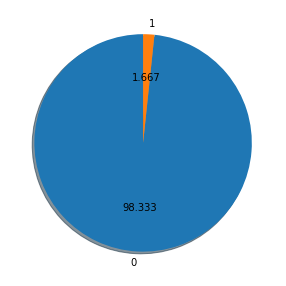

In [9]:
#train Percentage view of data distribution

plt.figure(figsize=(5,5))
plt.pie(df_train_t['target'].value_counts(),startangle=90,autopct="%.3f",labels=[0,1],shadow=True)


([<matplotlib.patches.Wedge at 0x7f5783ab03c8>,
 [Text(-0.05756949701481714, -1.0984924911047236, '0'),
  Text(0.05756943916265415, 1.0984924941366225, '1')],
 [Text(-0.03140154382626389, -0.5991777224207583, '98.333'),
  Text(0.03140151227053862, 0.5991777240745213, '1.667')])

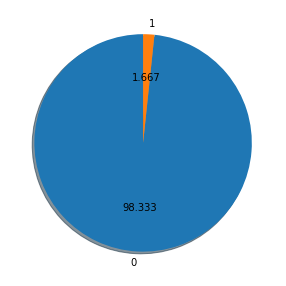

In [10]:
#test Percentage view of data distribution

plt.figure(figsize=(5,5))
plt.pie(df_test_t['target'].value_counts(),startangle=90,autopct="%.3f",labels=[0,1],shadow=True)


#Feature Engineering

###For each feature create new feature, that tells presence of nan, because nan values also contains some information

In [11]:
coloumns = df_train.columns

#Train
for coloumn in tqdm(coloumns):
    df_train[coloumn + "_nan"] = [1.0 if np.isnan(x) else 0.0 for x in df_train[coloumn]]
    df_train_t[coloumn + "_nan"] = [1.0 if np.isnan(x) else 0.0 for x in df_train_t[coloumn]]



#Test
for coloumn in tqdm(coloumns):
    df_test[coloumn + "_nan"] = [1.0 if np.isnan(x) else 0.0 for x in df_test[coloumn]]
    df_test_t[coloumn + "_nan"] = [1.0 if np.isnan(x) else 0.0 for x in df_test_t[coloumn]]

  0%|          | 0/170 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
  0%|          | 0/170 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [12]:
df_train.head()

,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,...,sensor77_measure_nan,sensor78_measure_nan,sensor79_measure_nan,sensor80_measure_nan,sensor81_measure_nan,sensor82_measure_nan,sensor83_measure_nan,sensor84_measure_nan,sensor85_measure_nan,sensor86_measure_nan,sensor87_measure_nan,sensor88_measure_nan,sensor89_measure_nan,sensor90_measure_nan,sensor91_measure_nan,sensor92_measure_nan,sensor93_measure_nan,sensor94_measure_nan,sensor95_measure_nan,sensor96_measure_nan,sensor97_measure_nan,sensor98_measure_nan,sensor99_measure_nan,sensor100_measure_nan,sensor101_measure_nan,sensor102_measure_nan,sensor103_measure_nan,sensor104_measure_nan,sensor105_histogram_bin0_nan,sensor105_histogram_bin1_nan,sensor105_histogram_bin2_nan,sensor105_histogram_bin3_nan,sensor105_histogram_bin4_nan,sensor105_histogram_bin5_nan,sensor105_histogram_bin6_nan,sensor105_histogram_bin7_nan,sensor105_histogram_bin8_nan,sensor105_histogram_bin9_nan,sensor106_measure_nan,sensor107_measure_nan
54001,36.0,0.0,1.000000e+01,10.0,0.0,0.0,0.0,0.0,0.0,3554.0,5894.0,3500.0,1250.0,0.0,2.0,32.0,3498.0,0.0,0.0,0.0,4526.0,6846.0,9322.0,10248.0,5986.0,446.0,2.0,0.0,0.0,0.0,28.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47399,41968.0,NaN,2.130706e+09,504.0,0.0,0.0,0.0,0.0,0.0,0.0,42052.0,1319986.0,1088958.0,199800.0,10290.0,0.0,1113500.0,0.0,0.0,0.0,0.0,0.0,2432312.0,2144902.0,363618.0,251130.0,0.0,0.0,0.0,0.0,356.0,80.0,0.0,0.0,0.0,0.0,0.0,30774.0,1597478.0,642424.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49418,7230.0,NaN,2.130706e+09,86.0,0.0,0.0,0.0,0.0,0.0,5158.0,104828.0,266524.0,90672.0,1518.0,0.0,0.0,193304.0,0.0,184.0,0.0,9462.0,14362.0,435772.0,420352.0,32628.0,18516.0,0.0,0.0,0.0,0.0,98.0,18.0,0.0,1692.0,18088.0,5994.0,21330.0,14700.0,134420.0,146588.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57927,236940.0,0.0,2.130706e+09,496.0,0.0,0.0,0.0,0.0,0.0,102444.0,1775500.0,6072816.0,1820694.0,105316.0,4494.0,0.0,6238706.0,0.0,0.0,0.0,80620.0,108746.0,12674636.0,11447832.0,4407216.0,1051812.0,0.0,0.0,0.0,0.0,438.0,686.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2430398.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29123,20.0,0.0,2.200000e+01,4.0,12.0,14.0,0.0,0.0,0.0,0.0,4.0,2668.0,2238.0,0.0,0.0,0.0,2000.0,0.0,140.0,0.0,0.0,0.0,13152.0,11344.0,8778.0,276.0,0.0,0.0,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###Drop features with more than 50% nan values

In [13]:
"""These dictionary will contain number of null values for each coloumns"""

null = dict(df_train.isnull().sum())

In [14]:
def features_with_high_nan(dataframe = df,percentage=50):

    """This function will give list of coloumns that have nan values above the percentage"""

    coloumns = df.columns
    high_nan_features = []

    total_rows = len(df)
    null = dict(df.isnull().sum())

    restricted_nan = int((percentage/100)*total_rows)

    for coloumn in coloumns:
        if null[coloumn] >= restricted_nan:
            high_nan_features.append(coloumn)

    return(high_nan_features)

In [15]:
high_nan_features = features_with_high_nan(dataframe = df_train,percentage=50)
print(high_nan_features)

['sensor2_measure', 'sensor38_measure', 'sensor39_measure', 'sensor40_measure', 'sensor41_measure', 'sensor42_measure', 'sensor43_measure', 'sensor68_measure']


In [16]:
#Train
df_train = df_train.drop(high_nan_features,axis=1)
df_train_t = df_train_t.drop(high_nan_features,axis=1)


#Test
df_test = df_test.drop(high_nan_features,axis=1)
df_test_t = df_test_t.drop(high_nan_features,axis=1)

df_train.head()

,sensor1_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,sensor24_histogram_bin8,...,sensor77_measure_nan,sensor78_measure_nan,sensor79_measure_nan,sensor80_measure_nan,sensor81_measure_nan,sensor82_measure_nan,sensor83_measure_nan,sensor84_measure_nan,sensor85_measure_nan,sensor86_measure_nan,sensor87_measure_nan,sensor88_measure_nan,sensor89_measure_nan,sensor90_measure_nan,sensor91_measure_nan,sensor92_measure_nan,sensor93_measure_nan,sensor94_measure_nan,sensor95_measure_nan,sensor96_measure_nan,sensor97_measure_nan,sensor98_measure_nan,sensor99_measure_nan,sensor100_measure_nan,sensor101_measure_nan,sensor102_measure_nan,sensor103_measure_nan,sensor104_measure_nan,sensor105_histogram_bin0_nan,sensor105_histogram_bin1_nan,sensor105_histogram_bin2_nan,sensor105_histogram_bin3_nan,sensor105_histogram_bin4_nan,sensor105_histogram_bin5_nan,sensor105_histogram_bin6_nan,sensor105_histogram_bin7_nan,sensor105_histogram_bin8_nan,sensor105_histogram_bin9_nan,sensor106_measure_nan,sensor107_measure_nan
54001,36.0,1.000000e+01,10.0,0.0,0.0,0.0,0.0,0.0,3554.0,5894.0,3500.0,1250.0,0.0,2.0,32.0,3498.0,0.0,0.0,0.0,4526.0,6846.0,9322.0,10248.0,5986.0,446.0,2.0,0.0,0.0,0.0,28.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11804.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47399,41968.0,2.130706e+09,504.0,0.0,0.0,0.0,0.0,0.0,0.0,42052.0,1319986.0,1088958.0,199800.0,10290.0,0.0,1113500.0,0.0,0.0,0.0,0.0,0.0,2432312.0,2144902.0,363618.0,251130.0,0.0,0.0,0.0,0.0,356.0,80.0,0.0,0.0,0.0,0.0,0.0,30774.0,1597478.0,642424.0,390410.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49418,7230.0,2.130706e+09,86.0,0.0,0.0,0.0,0.0,0.0,5158.0,104828.0,266524.0,90672.0,1518.0,0.0,0.0,193304.0,0.0,184.0,0.0,9462.0,14362.0,435772.0,420352.0,32628.0,18516.0,0.0,0.0,0.0,0.0,98.0,18.0,0.0,1692.0,18088.0,5994.0,21330.0,14700.0,134420.0,146588.0,125888.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57927,236940.0,2.130706e+09,496.0,0.0,0.0,0.0,0.0,0.0,102444.0,1775500.0,6072816.0,1820694.0,105316.0,4494.0,0.0,6238706.0,0.0,0.0,0.0,80620.0,108746.0,12674636.0,11447832.0,4407216.0,1051812.0,0.0,0.0,0.0,0.0,438.0,686.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2430398.0,7450866.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29123,20.0,2.200000e+01,4.0,12.0,14.0,0.0,0.0,0.0,0.0,4.0,2668.0,2238.0,0.0,0.0,0.0,2000.0,0.0,140.0,0.0,0.0,0.0,13152.0,11344.0,8778.0,276.0,0.0,0.0,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4910.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###Replace nan with median of that coloumn , because values of each feature is either very low or very high, replacing nan with mean is not sensible at all

In [17]:
#Train
df_train = df_train.fillna(df_train.median())
df_train_t = df_train_t.fillna(df_train_t.median())


#Test
df_test = df_test.fillna(df_train.median())                                     #Here we are filling test nan values with, train median
df_test_t = df_test_t.fillna(df_train_t.median())

df_test.head()

,sensor1_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,sensor24_histogram_bin8,...,sensor77_measure_nan,sensor78_measure_nan,sensor79_measure_nan,sensor80_measure_nan,sensor81_measure_nan,sensor82_measure_nan,sensor83_measure_nan,sensor84_measure_nan,sensor85_measure_nan,sensor86_measure_nan,sensor87_measure_nan,sensor88_measure_nan,sensor89_measure_nan,sensor90_measure_nan,sensor91_measure_nan,sensor92_measure_nan,sensor93_measure_nan,sensor94_measure_nan,sensor95_measure_nan,sensor96_measure_nan,sensor97_measure_nan,sensor98_measure_nan,sensor99_measure_nan,sensor100_measure_nan,sensor101_measure_nan,sensor102_measure_nan,sensor103_measure_nan,sensor104_measure_nan,sensor105_histogram_bin0_nan,sensor105_histogram_bin1_nan,sensor105_histogram_bin2_nan,sensor105_histogram_bin3_nan,sensor105_histogram_bin4_nan,sensor105_histogram_bin5_nan,sensor105_histogram_bin6_nan,sensor105_histogram_bin7_nan,sensor105_histogram_bin8_nan,sensor105_histogram_bin9_nan,sensor106_measure_nan,sensor107_measure_nan
19886,346.0,36.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,7610.0,30034.0,17002.0,6664.0,0.0,0.0,24964.0,0.0,0.0,0.0,672.0,2102.0,54668.0,44020.0,35990.0,3682.0,0.0,0.0,0.0,0.0,16.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3954.0,57356.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14400,39642.0,352.0,288.0,0.0,0.0,0.0,0.0,0.0,0.0,8658.0,486616.0,1546000.0,234780.0,12156.0,0.0,1173380.0,0.0,0.0,0.0,0.0,0.0,2107182.0,1859114.0,455388.0,188550.0,0.0,0.0,0.0,0.0,1182.0,214.0,0.0,0.0,0.0,0.0,0.0,12956.0,1939368.0,335886.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13932,1142.0,84.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,39778.0,65806.0,73312.0,5822.0,620.0,0.0,65830.0,0.0,0.0,0.0,1480.0,2802.0,159522.0,133470.0,95218.0,15562.0,0.0,0.0,0.0,0.0,50.0,108.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6740.0,178598.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49050,78342.0,1132.0,970.0,0.0,0.0,0.0,0.0,0.0,0.0,3258.0,164864.0,3624130.0,1107092.0,47188.0,336.0,2471426.0,0.0,0.0,0.0,0.0,0.0,4739516.0,4429384.0,524660.0,242618.0,0.0,0.0,0.0,0.0,2692.0,384.0,0.0,0.0,0.0,0.0,0.0,0.0,1862892.0,3036294.0,47682.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52585,2172.0,38.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,142.0,3012.0,92942.0,25738.0,0.0,0.0,45670.0,0.0,0.0,0.0,0.0,0.0,131606.0,124376.0,8632.0,4436.0,0.0,0.0,0.0,0.0,34.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,56366.0,65468.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###We have 100 simple sensor, and 7 time based sensor. Here we will extract min, max and mean from those time based sensors

In [19]:
time_based_sensor = []
sensor_name = []

for sensor in df_train.columns:
    if (("histogram" in sensor) and ("nan" not in sensor)):
        sensor_name.append(sensor)
        
        if len(sensor_name) == 10:
            time_based_sensor.append(sensor_name)
            sensor_name = []


print(time_based_sensor)

[['sensor7_histogram_bin0', 'sensor7_histogram_bin1', 'sensor7_histogram_bin2', 'sensor7_histogram_bin3', 'sensor7_histogram_bin4', 'sensor7_histogram_bin5', 'sensor7_histogram_bin6', 'sensor7_histogram_bin7', 'sensor7_histogram_bin8', 'sensor7_histogram_bin9'], ['sensor24_histogram_bin0', 'sensor24_histogram_bin1', 'sensor24_histogram_bin2', 'sensor24_histogram_bin3', 'sensor24_histogram_bin4', 'sensor24_histogram_bin5', 'sensor24_histogram_bin6', 'sensor24_histogram_bin7', 'sensor24_histogram_bin8', 'sensor24_histogram_bin9'], ['sensor25_histogram_bin0', 'sensor25_histogram_bin1', 'sensor25_histogram_bin2', 'sensor25_histogram_bin3', 'sensor25_histogram_bin4', 'sensor25_histogram_bin5', 'sensor25_histogram_bin6', 'sensor25_histogram_bin7', 'sensor25_histogram_bin8', 'sensor25_histogram_bin9'], ['sensor26_histogram_bin0', 'sensor26_histogram_bin1', 'sensor26_histogram_bin2', 'sensor26_histogram_bin3', 'sensor26_histogram_bin4', 'sensor26_histogram_bin5', 'sensor26_histogram_bin6', 'se

In [20]:
def mean(a,b,c,d,e,f,g,h,i,j):
    list_ = [a,b,c,d,e,f,g,h,i,j]
    return np.mean(list_)


def min_(a,b,c,d,e,f,g,h,i,j):
    list_ = [a,b,c,d,e,f,g,h,i,j]
    return min(list_)


def max_(a,b,c,d,e,f,g,h,i,j):
    list_ = [a,b,c,d,e,f,g,h,i,j]
    return max(list_)


In [21]:
#Train
for i in tqdm(range(0,len(time_based_sensor))):
    df_train[time_based_sensor[i][0].split("_")[0] + "_mean"] = df_train.apply(lambda row : mean(row[time_based_sensor[i][0]] , row[time_based_sensor[i][1]] , row[time_based_sensor[i][2]] , 
                                                                                     row[time_based_sensor[i][3]] , row[time_based_sensor[i][4]] , row[time_based_sensor[i][5]] , 
                                                                                     row[time_based_sensor[i][6]] , row[time_based_sensor[i][7]] , row[time_based_sensor[i][8]] , 
                                                                                     row[time_based_sensor[i][9]] ) , axis = 1)


    df_train[time_based_sensor[i][0].split("_")[0] + "_min"] = df_train.apply(lambda row : min_(row[time_based_sensor[i][0]] , row[time_based_sensor[i][1]] , row[time_based_sensor[i][2]] , 
                                                                                     row[time_based_sensor[i][3]] , row[time_based_sensor[i][4]] , row[time_based_sensor[i][5]] , 
                                                                                     row[time_based_sensor[i][6]] , row[time_based_sensor[i][7]] , row[time_based_sensor[i][8]] , 
                                                                                     row[time_based_sensor[i][9]] ) , axis = 1)

    df_train[time_based_sensor[i][0].split("_")[0] + "_max"] = df_train.apply(lambda row : max_(row[time_based_sensor[i][0]] , row[time_based_sensor[i][1]] , row[time_based_sensor[i][2]] , 
                                                                                     row[time_based_sensor[i][3]] , row[time_based_sensor[i][4]] , row[time_based_sensor[i][5]] , 
                                                                                     row[time_based_sensor[i][6]] , row[time_based_sensor[i][7]] , row[time_based_sensor[i][8]] , 
                                                                                     row[time_based_sensor[i][9]] ) , axis = 1)



    df_train_t[time_based_sensor[i][0].split("_")[0] + "_mean"] = df_train_t.apply(lambda row : mean(row[time_based_sensor[i][0]] , row[time_based_sensor[i][1]] , row[time_based_sensor[i][2]] , 
                                                                                     row[time_based_sensor[i][3]] , row[time_based_sensor[i][4]] , row[time_based_sensor[i][5]] , 
                                                                                     row[time_based_sensor[i][6]] , row[time_based_sensor[i][7]] , row[time_based_sensor[i][8]] , 
                                                                                     row[time_based_sensor[i][9]] ) , axis = 1)


    df_train_t[time_based_sensor[i][0].split("_")[0] + "_min"] = df_train_t.apply(lambda row : min_(row[time_based_sensor[i][0]] , row[time_based_sensor[i][1]] , row[time_based_sensor[i][2]] , 
                                                                                     row[time_based_sensor[i][3]] , row[time_based_sensor[i][4]] , row[time_based_sensor[i][5]] , 
                                                                                     row[time_based_sensor[i][6]] , row[time_based_sensor[i][7]] , row[time_based_sensor[i][8]] , 
                                                                                     row[time_based_sensor[i][9]] ) , axis = 1)

    df_train_t[time_based_sensor[i][0].split("_")[0] + "_max"] = df_train_t.apply(lambda row : max_(row[time_based_sensor[i][0]] , row[time_based_sensor[i][1]] , row[time_based_sensor[i][2]] , 
                                                                                     row[time_based_sensor[i][3]] , row[time_based_sensor[i][4]] , row[time_based_sensor[i][5]] , 
                                                                                     row[time_based_sensor[i][6]] , row[time_based_sensor[i][7]] , row[time_based_sensor[i][8]] , 
                                                                                     row[time_based_sensor[i][9]] ) , axis = 1)




#Test
for i in tqdm(range(0,len(time_based_sensor))):
    df_test[time_based_sensor[i][0].split("_")[0] + "_mean"] = df_test.apply(lambda row : mean(row[time_based_sensor[i][0]] , row[time_based_sensor[i][1]] , row[time_based_sensor[i][2]] , 
                                                                                     row[time_based_sensor[i][3]] , row[time_based_sensor[i][4]] , row[time_based_sensor[i][5]] , 
                                                                                     row[time_based_sensor[i][6]] , row[time_based_sensor[i][7]] , row[time_based_sensor[i][8]] , 
                                                                                     row[time_based_sensor[i][9]] ) , axis = 1)


    df_test[time_based_sensor[i][0].split("_")[0] + "_min"] = df_test.apply(lambda row : min_(row[time_based_sensor[i][0]] , row[time_based_sensor[i][1]] , row[time_based_sensor[i][2]] , 
                                                                                     row[time_based_sensor[i][3]] , row[time_based_sensor[i][4]] , row[time_based_sensor[i][5]] , 
                                                                                     row[time_based_sensor[i][6]] , row[time_based_sensor[i][7]] , row[time_based_sensor[i][8]] , 
                                                                                     row[time_based_sensor[i][9]] ) , axis = 1)

    df_test[time_based_sensor[i][0].split("_")[0] + "_max"] = df_test.apply(lambda row : max_(row[time_based_sensor[i][0]] , row[time_based_sensor[i][1]] , row[time_based_sensor[i][2]] , 
                                                                                     row[time_based_sensor[i][3]] , row[time_based_sensor[i][4]] , row[time_based_sensor[i][5]] , 
                                                                                     row[time_based_sensor[i][6]] , row[time_based_sensor[i][7]] , row[time_based_sensor[i][8]] , 
                                                                                     row[time_based_sensor[i][9]] ) , axis = 1)


    df_test_t[time_based_sensor[i][0].split("_")[0] + "_mean"] = df_test_t.apply(lambda row : mean(row[time_based_sensor[i][0]] , row[time_based_sensor[i][1]] , row[time_based_sensor[i][2]] , 
                                                                                     row[time_based_sensor[i][3]] , row[time_based_sensor[i][4]] , row[time_based_sensor[i][5]] , 
                                                                                     row[time_based_sensor[i][6]] , row[time_based_sensor[i][7]] , row[time_based_sensor[i][8]] , 
                                                                                     row[time_based_sensor[i][9]] ) , axis = 1)


    df_test_t[time_based_sensor[i][0].split("_")[0] + "_min"] = df_test_t.apply(lambda row : min_(row[time_based_sensor[i][0]] , row[time_based_sensor[i][1]] , row[time_based_sensor[i][2]] , 
                                                                                     row[time_based_sensor[i][3]] , row[time_based_sensor[i][4]] , row[time_based_sensor[i][5]] , 
                                                                                     row[time_based_sensor[i][6]] , row[time_based_sensor[i][7]] , row[time_based_sensor[i][8]] , 
                                                                                     row[time_based_sensor[i][9]] ) , axis = 1)

    df_test_t[time_based_sensor[i][0].split("_")[0] + "_max"] = df_test_t.apply(lambda row : max_(row[time_based_sensor[i][0]] , row[time_based_sensor[i][1]] , row[time_based_sensor[i][2]] , 
                                                                                     row[time_based_sensor[i][3]] , row[time_based_sensor[i][4]] , row[time_based_sensor[i][5]] , 
                                                                                     row[time_based_sensor[i][6]] , row[time_based_sensor[i][7]] , row[time_based_sensor[i][8]] , 
                                                                                     row[time_based_sensor[i][9]] ) , axis = 1)



df_train.head()

100%|██████████| 7/7 [00:43<00:00,  6.22s/it]


,sensor1_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,sensor24_histogram_bin8,...,sensor98_measure_nan,sensor99_measure_nan,sensor100_measure_nan,sensor101_measure_nan,sensor102_measure_nan,sensor103_measure_nan,sensor104_measure_nan,sensor105_histogram_bin0_nan,sensor105_histogram_bin1_nan,sensor105_histogram_bin2_nan,sensor105_histogram_bin3_nan,sensor105_histogram_bin4_nan,sensor105_histogram_bin5_nan,sensor105_histogram_bin6_nan,sensor105_histogram_bin7_nan,sensor105_histogram_bin8_nan,sensor105_histogram_bin9_nan,sensor106_measure_nan,sensor107_measure_nan,sensor7_mean,sensor7_min,sensor7_max,sensor24_mean,sensor24_min,sensor24_max,sensor25_mean,sensor25_min,sensor25_max,sensor26_mean,sensor26_min,sensor26_max,sensor64_mean,sensor64_min,sensor64_max,sensor69_mean,sensor69_min,sensor69_max,sensor105_mean,sensor105_min,sensor105_max
54001,36.0,1.000000e+01,10.0,0.0,0.0,0.0,0.0,0.0,3554.0,5894.0,3500.0,1250.0,0.0,2.0,32.0,3498.0,0.0,0.0,0.0,4526.0,6846.0,9322.0,10248.0,5986.0,446.0,2.0,0.0,0.0,0.0,28.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11804.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1423.2,0.0,5894.0,1423.2,0.0,11804.0,1423.2,0.0,5756.0,1423.2,0.0,10532.0,1423.2,0.0,4830.0,1423.2,0.0,7400.0,1423.2,0.0,8206.0
47399,41968.0,2.130706e+09,504.0,0.0,0.0,0.0,0.0,0.0,0.0,42052.0,1319986.0,1088958.0,199800.0,10290.0,0.0,1113500.0,0.0,0.0,0.0,0.0,0.0,2432312.0,2144902.0,363618.0,251130.0,0.0,0.0,0.0,0.0,356.0,80.0,0.0,0.0,0.0,0.0,0.0,30774.0,1597478.0,642424.0,390410.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,266108.6,0.0,1319986.0,266108.6,0.0,1597478.0,266108.6,0.0,2495658.0,266108.6,0.0,946540.0,266108.6,0.0,1149218.0,266108.6,0.0,1166534.0,266108.6,786.0,558952.0
49418,7230.0,2.130706e+09,86.0,0.0,0.0,0.0,0.0,0.0,5158.0,104828.0,266524.0,90672.0,1518.0,0.0,0.0,193304.0,0.0,184.0,0.0,9462.0,14362.0,435772.0,420352.0,32628.0,18516.0,0.0,0.0,0.0,0.0,98.0,18.0,0.0,1692.0,18088.0,5994.0,21330.0,14700.0,134420.0,146588.0,125888.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46870.0,0.0,266524.0,46870.0,0.0,146588.0,46870.0,0.0,408870.0,46870.0,0.0,261650.0,46870.0,0.0,207164.0,46870.0,0.0,328640.0,46870.0,0.0,109634.0
57927,236940.0,2.130706e+09,496.0,0.0,0.0,0.0,0.0,0.0,102444.0,1775500.0,6072816.0,1820694.0,105316.0,4494.0,0.0,6238706.0,0.0,0.0,0.0,80620.0,108746.0,12674636.0,11447832.0,4407216.0,1051812.0,0.0,0.0,0.0,0.0,438.0,686.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2430398.0,7450866.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,988126.4,0.0,6072816.0,988126.4,0.0,7450866.0,988126.4,0.0,7410040.0,988126.4,208268.0,3809044.0,988126.4,0.0,3799150.0,988126.4,0.0,7630596.0,988126.4,342.0,3113856.0
29123,20.0,2.200000e+01,4.0,12.0,14.0,0.0,0.0,0.0,0.0,4.0,2668.0,2238.0,0.0,0.0,0.0,2000.0,0.0,140.0,0.0,0.0,0.0,13152.0,11344.0,8778.0,276.0,0.0,0.0,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4910.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,491.0,0.0,2668.0,491.0,0.0,4910.0,491.0,0.0,3664.0,491.0,0.0,3132.0,491.0,0.0,3352.0,491.0,0.0,1752.0,491.0,0.0,2736.0


###We are not removing outliers, because most of the values of class 1 lies in outlies only

100%|██████████| 4/4 [00:00<00:00, 84.83it/s]


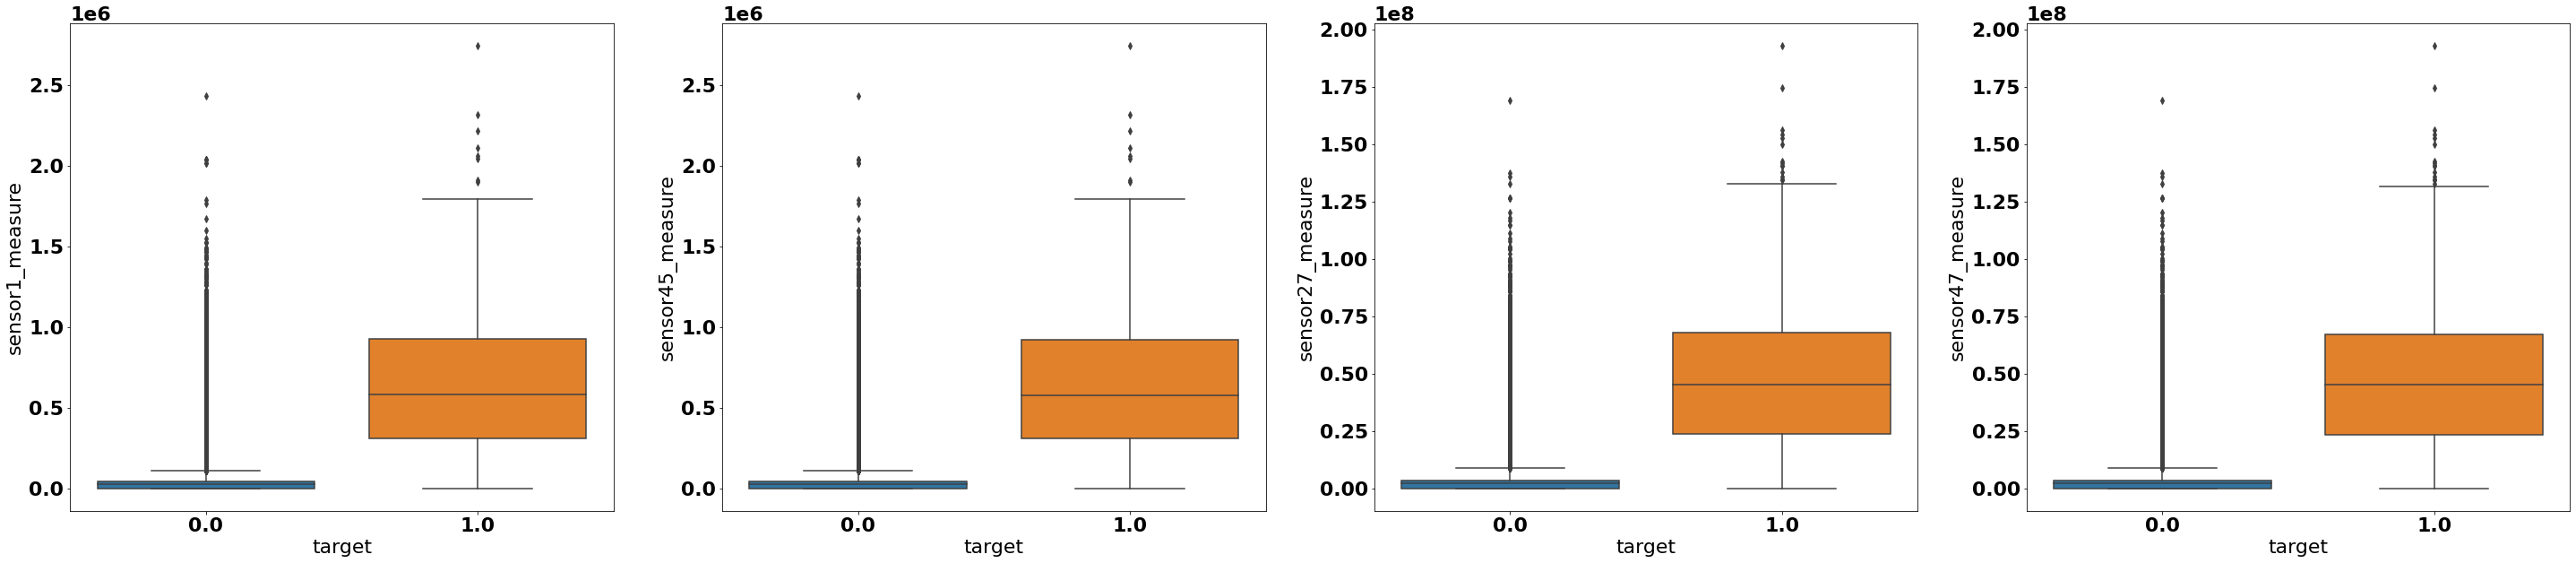

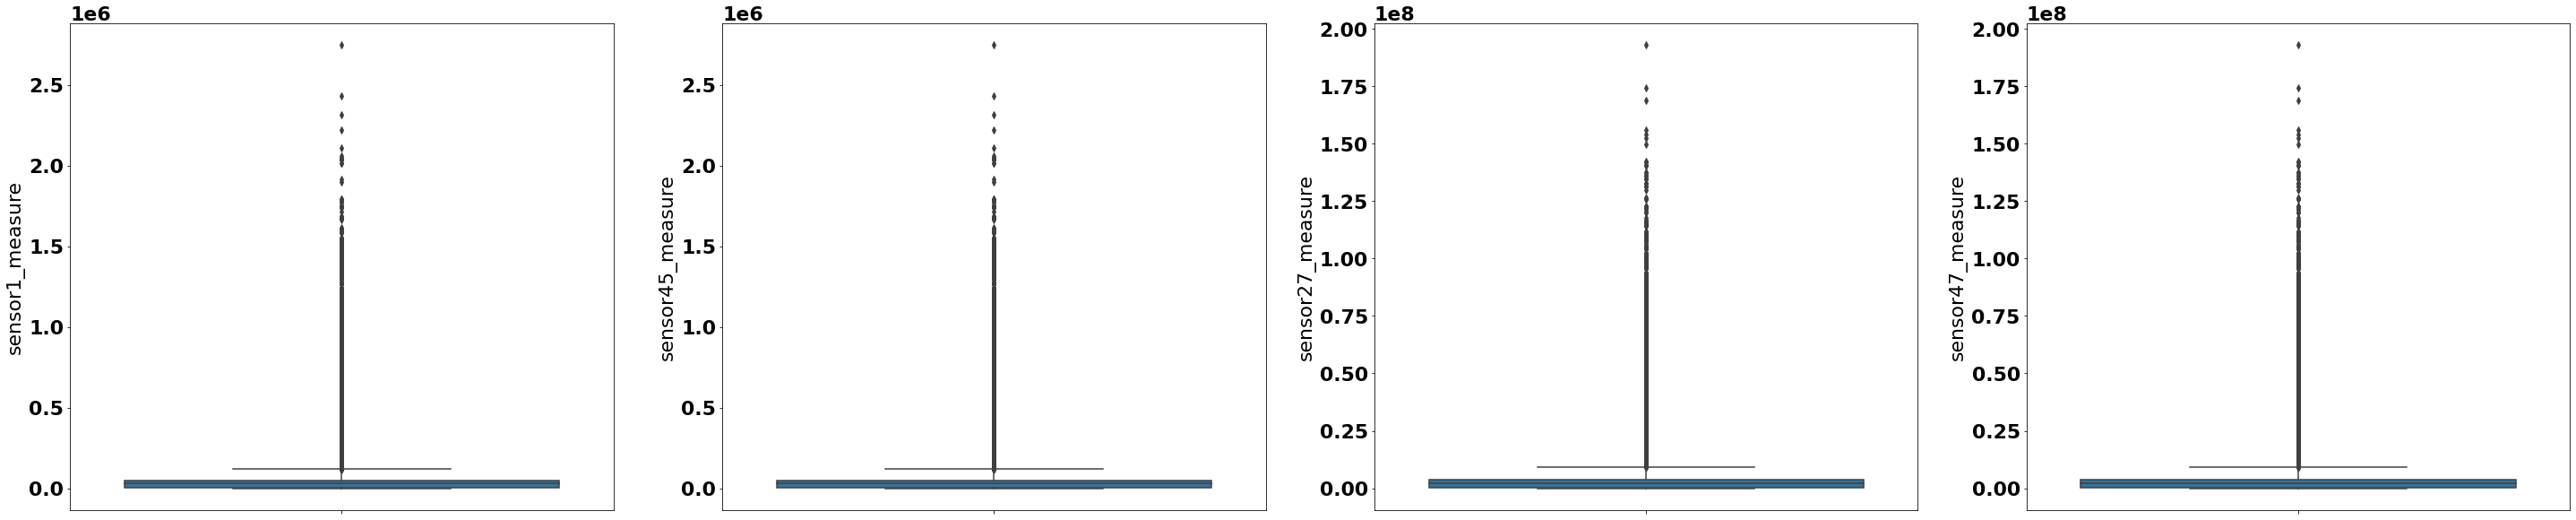

In [23]:
def get_highly_correlated_feature(dataframe=df,correlation="pearson",top_features=10,with_="target"):
    """
    correlation can be {‘pearson’, ‘kendall’, ‘spearman’}
    top feature: it will give you top n correlated feature
    with: pass the coloumn name, with whome you want correlation
    datagrame: pass pandas dataframe
    """

    pearson_corr_dict = dataframe.corr(method=correlation)[with_].to_dict()
    
    #sorted_dict = dict(sorted(pearson_corr_dict.items(), key=lambda x: abs(x[1]) , reverse=True))
    #print(sorted_dict)

    top_n_features = dict(sorted(pearson_corr_dict.items(), key=lambda x: abs(x[1]) , reverse=True)[:top_features])

    return top_n_features

top_n_features = get_highly_correlated_feature(dataframe=df_train_t,correlation="pearson",top_features=5,with_="target")


font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

figure, axis = plt.subplots(1 , 4, figsize=(50, 10), squeeze=False)

top_coloumns = list(top_n_features.keys())[1:]



for i in tqdm(range(0,4)):

    sns.boxplot( x= "target",    y=top_coloumns[i]       , data=df_train_t   , orient='v'       , ax = axis[0,i])


figure, axis = plt.subplots(1 , 4, figsize=(50, 10), squeeze=False)

top_coloumns = list(top_n_features.keys())[1:]


for i in tqdm(range(0,4)):

    sns.boxplot( y=top_coloumns[i]       , data=df_train_t   , orient='v'       , ax = axis[0,i])


#Feature Selection

###Removing all the features which are least correlated to our target

In [25]:
def get_least_correlated_feature(dataframe=df,correlation="pearson",bottom_features=10,with_="target"):
    """
    correlation can be {‘pearson’, ‘kendall’, ‘spearman’}
    top feature: it will give you top n correlated feature
    with: pass the coloumn name, with whome you want correlation
    datagrame: pass pandas dataframe
    """

    pearson_corr_dict = dataframe.corr(method=correlation)[with_].to_dict()
    
    #sorted_dict = dict(sorted(pearson_corr_dict.items(), key=lambda x: abs(x[1]) , reverse=True))
    #print(sorted_dict)

    bottom_n_features = dict(sorted(pearson_corr_dict.items(), key=lambda x: abs(x[1]) , reverse=False)[:bottom_features])

    return bottom_n_features

bottom_n_features = get_least_correlated_feature(dataframe=df_train_t,correlation="pearson",bottom_features=50,with_="target")

print(bottom_n_features)

{'sensor25_histogram_bin9': 0.000404517327265069, 'sensor4_measure': -0.0005747918610703464, 'sensor56_measure': -0.0005748712717671971, 'sensor5_measure': 0.0049155354265320835, 'sensor11_measure': 0.009916908809815243, 'sensor58_measure': 0.01059940096136381, 'sensor7_histogram_bin0': 0.01294021509713912, 'sensor51_measure': 0.013621459736873134, 'sensor6_measure': 0.017107076446795995, 'sensor10_measure': 0.02468204011878808, 'sensor19_measure': 0.03708248668363326, 'sensor25_histogram_bin8': 0.041206207254457984, 'sensor24_histogram_bin9': 0.043057504354250674, 'sensor37_measure': 0.043897895823239254, 'sensor3_measure': -0.051002937599027735, 'sensor52_measure': 0.06324685224384541, 'sensor7_histogram_bin9': 0.06920109437855675, 'sensor36_measure': 0.07690434675315028, 'sensor21_measure': 0.0804369760372321, 'sensor57_measure': 0.08208832652054504, 'sensor25_histogram_bin6': 0.08559288657182362, 'sensor23_measure': 0.108115369374851, 'sensor24_histogram_bin1': 0.10831300029067002,

In [26]:
#train
df_train = df_train.drop(bottom_n_features.keys(),axis=1)
df_train_t = df_train_t.drop(bottom_n_features.keys(),axis=1)

#test
df_test = df_test.drop(bottom_n_features.keys(),axis=1)
df_test_t = df_test_t.drop(bottom_n_features.keys(),axis=1)

In [27]:
df_train.head()

,sensor1_measure,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor8_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor24_histogram_bin7,sensor24_histogram_bin8,sensor25_histogram_bin4,sensor25_histogram_bin5,sensor26_histogram_bin0,sensor26_histogram_bin1,sensor26_histogram_bin2,sensor26_histogram_bin3,sensor26_histogram_bin4,sensor26_histogram_bin5,sensor26_histogram_bin6,sensor26_histogram_bin7,sensor27_measure,sensor32_measure,sensor33_measure,sensor34_measure,sensor35_measure,sensor45_measure,sensor46_measure,sensor47_measure,sensor48_measure,sensor49_measure,sensor53_measure,sensor54_measure,sensor59_measure,sensor60_measure,sensor61_measure,...,sensor98_measure_nan,sensor99_measure_nan,sensor100_measure_nan,sensor101_measure_nan,sensor102_measure_nan,sensor103_measure_nan,sensor104_measure_nan,sensor105_histogram_bin0_nan,sensor105_histogram_bin1_nan,sensor105_histogram_bin2_nan,sensor105_histogram_bin3_nan,sensor105_histogram_bin4_nan,sensor105_histogram_bin5_nan,sensor105_histogram_bin6_nan,sensor105_histogram_bin7_nan,sensor105_histogram_bin8_nan,sensor105_histogram_bin9_nan,sensor106_measure_nan,sensor107_measure_nan,sensor7_mean,sensor7_min,sensor7_max,sensor24_mean,sensor24_min,sensor24_max,sensor25_mean,sensor25_min,sensor25_max,sensor26_mean,sensor26_min,sensor26_max,sensor64_mean,sensor64_min,sensor64_max,sensor69_mean,sensor69_min,sensor69_max,sensor105_mean,sensor105_min,sensor105_max
54001,36.0,0.0,3554.0,5894.0,3500.0,1250.0,3498.0,4526.0,6846.0,9322.0,10248.0,5986.0,446.0,0.0,11804.0,26.0,4354.0,10532.0,1538.0,622.0,278.0,808.0,272.0,122.0,60.0,19888.0,3498.0,264.0,1542.0,4416.0,36.650002,19888.0,19888.0,20044.0,52.0,14322.0,1209600.0,6.680640e+03,174.720001,6.291840e+03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1423.2,0.0,5894.0,1423.2,0.0,11804.0,1423.2,0.0,5756.0,1423.2,0.0,10532.0,1423.2,0.0,4830.0,1423.2,0.0,7400.0,1423.2,0.0,8206.0
47399,41968.0,0.0,0.0,42052.0,1319986.0,1088958.0,1113500.0,0.0,0.0,2432312.0,2144902.0,363618.0,251130.0,642424.0,390410.0,161402.0,2495658.0,946540.0,472122.0,229456.0,191038.0,181770.0,262610.0,377550.0,0.0,2796376.0,1113500.0,33186.0,191780.0,170976.0,41967.140625,2796376.0,2796376.0,2802386.0,18346.0,2661086.0,1209600.0,2.177207e+06,0.000000,4.822378e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,266108.6,0.0,1319986.0,266108.6,0.0,1597478.0,266108.6,0.0,2495658.0,266108.6,0.0,946540.0,266108.6,0.0,1149218.0,266108.6,0.0,1166534.0,266108.6,786.0,558952.0
49418,7230.0,0.0,5158.0,104828.0,266524.0,90672.0,193304.0,9462.0,14362.0,435772.0,420352.0,32628.0,18516.0,146588.0,125888.0,51476.0,408870.0,145190.0,261650.0,45242.0,11984.0,3612.0,720.0,294.0,8.0,477940.0,193304.0,3378.0,12160.0,20402.0,7229.979980,477940.0,477940.0,487378.0,1723.0,468700.0,1209600.0,4.114416e+05,0.000000,5.685600e+04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46870.0,0.0,266524.0,46870.0,0.0,146588.0,46870.0,0.0,408870.0,46870.0,0.0,261650.0,46870.0,0.0,207164.0,46870.0,0.0,328640.0,46870.0,0.0,109634.0
57927,236940.0,0.0,102444.0,1775500.0,6072816.0,1820694.0,6238706.0,80620.0,108746.0,12674636.0,11447832.0,4407216.0,1051812.0,2430398.0,7450866.0,68888.0,7410040.0,3809044.0,1959364.0,1121184.0,756424.0,547704.0,415052.0,333358.0,281140.0,17164224.0,6238706.0,147500.0,3352788.0,1048536.0,236940.531250,17164224.0,17164224.0,12558090.0,54092.0,9900572.0,1209600.0,1.174521e+07,0.000000,1.600156e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,988126.4,0.0,6072816.0,988126.4,0.0,7450866.0,988126.4,0.0,7410040.0,988126.4,208268.0,3809044.0,988126.4,0.0,3799150.0,988126.4,0.0,7630596.0,988126.4,342.0,3113856.0
29123,20.0,0.0,0.0,4.0,2668.0,2238.0,2000.0,0.0,0.0,13152.0,11344.0,8778.0,276.0,0.0,4910.0,24.0,3664.0,3132.0,388.

###Removing all the intercorrelated features

In [29]:
def get_threshold_highly_correlated_feature(dataframe=df,correlation="pearson",threshold=0.9,with_="sensor" , target = "target" , verbose=0):
    """
    correlation can be {‘pearson’, ‘kendall’, ‘spearman’}
    top threshold : it will give you top correlated feature whose correlation is more than threshold
    with: pass the coloumn name, with whome you want correlation
    datagrame: pass pandas dataframe
    """

    pearson_corr_dict = dataframe.corr(method=correlation)[with_].to_dict()
    
    #sorted_dict = dict(sorted(pearson_corr_dict.items(), key=lambda x: abs(x[1]) , reverse=True))
    #print(sorted_dict)

    top_features = dict(sorted(pearson_corr_dict.items(), key=lambda x: x[1] , reverse=True))
    
    if verbose == 1:
        print(top_features)

    del top_features[target]
    del top_features[with_]

    keys = list(top_features.keys())

    top_threshold = []

    i = 0

    while(top_features[keys[i]] > threshold):
        top_threshold.append(keys[i])
        i = i + 1

    #print(top_features)

    return top_threshold

print(get_threshold_highly_correlated_feature(dataframe=df_train_t,correlation="pearson",threshold=0.9,with_="sensor1_measure" , target = "target" , verbose=1))

{'sensor1_measure': 1.0, 'sensor45_measure': 0.9986261506454477, 'sensor15_measure': 0.9090568739804951, 'sensor27_measure': 0.9048353181987419, 'sensor14_measure': 0.9044057573750682, 'sensor46_measure': 0.9022527002187234, 'sensor47_measure': 0.902252652032122, 'sensor8_measure': 0.8969883894192284, 'sensor32_measure': 0.8966381125083075, 'sensor49_measure': 0.8424060116915599, 'sensor48_measure': 0.8309521423161766, 'sensor53_measure': 0.8284143983391306, 'sensor33_measure': 0.8260082458911359, 'sensor26_histogram_bin3': 0.8191278192666459, 'sensor16_measure': 0.8129660478971373, 'sensor26_histogram_bin2': 0.8069807232245817, 'sensor26_histogram_bin4': 0.8060956020786894, 'sensor34_measure': 0.7964456527040453, 'sensor26_histogram_bin1': 0.7894827050594928, 'sensor7_histogram_bin5': 0.7711750660156708, 'sensor17_measure': 0.7704552985897751, 'sensor89_measure': 0.7668826817240714, 'sensor26_histogram_bin5': 0.757150295142547, 'sensor25_histogram_bin5': 0.7312106190158396, 'sensor105

In [30]:
def remove_intercorrelated_features(dataframe = df , correlation="pearson" , threshold = 0.9 , target = "target", verbose=0):
    """
    we do not want to remove features that are highly correlated to dataframe,
    but we want to remove highly intercollinearity.

    algorithm:- first select highly collinear feature to target, then remove all the highly intercollinear feature to that target.
    this keep on doing until reach the last feature
    """

    i = 2

    while(i < len(dataframe.columns)):

        top_feature = get_highly_correlated_feature(dataframe=dataframe, correlation=correlation , top_features=i, with_= target)

        top_coloumns = list(top_feature.keys())[1:]
        
        if verbose == 1:
            print("top_coloumns = ",top_coloumns)

        key = top_coloumns[-1]

        if verbose == 1:
            print("key = ",key)

        top_threshold = get_threshold_highly_correlated_feature(dataframe=dataframe,correlation=correlation , threshold=threshold ,with_=key , target = target , verbose=verbose)

        for thres in top_threshold:
            if thres in top_coloumns:
                top_threshold.remove(thres)

        if verbose == 1:
            print("top_threshold = ",top_threshold)

        dataframe = dataframe.drop(top_threshold , axis=1)

        i = i + 1

        print( str(dataframe.shape[1] - i ) + " itteration remaining" )

    return dataframe

In [31]:
#This cell will take, too much time to execute

df_filtered = remove_intercorrelated_features(dataframe = df_train_t , correlation="pearson" , threshold = 0.9 , target = "target" , verbose=0)

295 itteration remaining
290 itteration remaining
289 itteration remaining
286 itteration remaining
285 itteration remaining
283 itteration remaining
282 itteration remaining
280 itteration remaining
277 itteration remaining
276 itteration remaining
274 itteration remaining
273 itteration remaining
272 itteration remaining
271 itteration remaining
270 itteration remaining
269 itteration remaining
268 itteration remaining
267 itteration remaining
266 itteration remaining
265 itteration remaining
263 itteration remaining
262 itteration remaining
261 itteration remaining
260 itteration remaining
259 itteration remaining
258 itteration remaining
257 itteration remaining
255 itteration remaining
253 itteration remaining
252 itteration remaining
251 itteration remaining
250 itteration remaining
249 itteration remaining
248 itteration remaining
247 itteration remaining
246 itteration remaining
245 itteration remaining
244 itteration remaining
243 itteration remaining
242 itteration remaining


In [32]:
df_filtered.head()

,target,sensor1_measure,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor13_measure,sensor17_measure,sensor24_histogram_bin7,sensor24_histogram_bin8,sensor25_histogram_bin4,sensor25_histogram_bin5,sensor26_histogram_bin4,sensor26_histogram_bin5,sensor26_histogram_bin6,sensor26_histogram_bin7,sensor34_measure,sensor48_measure,sensor54_measure,sensor59_measure,sensor60_measure,sensor61_measure,sensor62_measure,sensor63_measure,sensor64_histogram_bin0,sensor64_histogram_bin1,sensor64_histogram_bin2,sensor64_histogram_bin3,sensor64_histogram_bin4,sensor64_histogram_bin5,sensor64_histogram_bin6,sensor64_histogram_bin7,sensor64_histogram_bin8,sensor64_histogram_bin9,sensor65_measure,sensor66_measure,sensor69_histogram_bin0,sensor69_histogram_bin1,sensor69_histogram_bin2,sensor69_histogram_bin4,sensor69_histogram_bin6,...,sensor84_measure_nan,sensor85_measure_nan,sensor87_measure_nan,sensor88_measure_nan,sensor89_measure_nan,sensor91_measure_nan,sensor93_measure_nan,sensor95_measure_nan,sensor97_measure_nan,sensor98_measure_nan,sensor100_measure_nan,sensor103_measure_nan,sensor104_measure_nan,sensor105_histogram_bin1_nan,sensor105_histogram_bin3_nan,sensor105_histogram_bin5_nan,sensor105_histogram_bin7_nan,sensor105_histogram_bin9_nan,sensor106_measure_nan,sensor7_mean,sensor7_min,sensor7_max,sensor24_mean,sensor24_min,sensor24_max,sensor25_mean,sensor25_min,sensor25_max,sensor26_mean,sensor26_min,sensor26_max,sensor64_mean,sensor64_min,sensor64_max,sensor69_mean,sensor69_min,sensor69_max,sensor105_mean,sensor105_min,sensor105_max
54001,0.0,36.0,0.0,3554.0,5894.0,6846.0,446.0,0.0,11804.0,26.0,4354.0,808.0,272.0,122.0,60.0,1542.0,20044.0,1209600.0,6.680640e+03,174.720001,6.291840e+03,4.0,18.0,0.0,2584.0,4830.0,2858.0,3342.0,374.0,218.0,26.0,0.0,0.0,12.0,18.0,1270.0,40.0,30.0,312.0,7400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1423.2,0.0,5894.0,1423.2,0.0,11804.0,1423.2,0.0,5756.0,1423.2,0.0,10532.0,1423.2,0.0,4830.0,1423.2,0.0,7400.0,1423.2,0.0,8206.0
47399,0.0,41968.0,0.0,0.0,42052.0,0.0,251130.0,642424.0,390410.0,161402.0,2495658.0,181770.0,262610.0,377550.0,0.0,191780.0,2802386.0,1209600.0,2.177207e+06,0.000000,4.822378e+05,2.0,168.0,0.0,0.0,0.0,196590.0,1149218.0,973846.0,313830.0,21716.0,5192.0,694.0,28.0,34.0,3604.0,434.0,107896.0,111654.0,1166534.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,266108.6,0.0,1319986.0,266108.6,0.0,1597478.0,266108.6,0.0,2495658.0,266108.6,0.0,946540.0,266108.6,0.0,1149218.0,266108.6,0.0,1166534.0,266108.6,786.0,558952.0
49418,0.0,7230.0,0.0,5158.0,104828.0,14362.0,18516.0,146588.0,125888.0,51476.0,408870.0,3612.0,720.0,294.0,8.0,12160.0,487378.0,1209600.0,4.114416e+05,0.000000,5.685600e+04,0.0,46.0,0.0,2722.0,21972.0,207164.0,189386.0,44370.0,2250.0,696.0,128.0,12.0,0.0,6.0,548.0,86.0,13972.0,7746.0,84764.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46870.0,0.0,266524.0,46870.0,0.0,146588.0,46870.0,0.0,408870.0,46870.0,0.0,261650.0,46870.0,0.0,207164.0,46870.0,0.0,328640.0,46870.0,0.0,109634.0
57927,0.0,236940.0,0.0,102444.0,1775500.0,108746.0,1051812.0,2430398.0,7450866.0,68888.0,7410040.0,547704.0,415052.0,333358.0,281140.0,3352788.0,12558090.0,1209600.0,1.174521e+07,0.000000,1.600156e+06,1368.0,2898.0,0.0,30.0,109714.0,849812.0,2727604.0,3799150.0,1461644.0,718812.0,209578.0,4920.0,0.0,398.0,11736.0,1708.0,615542.0,313506.0,862418.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,988126.4,0.0,6072816.0,988126.4,0.0,7450866.0,988126.4,0.0,7410040.0,988126.4,208268.0,3809044.0,988126.4,0.0,3799150.0,988126.4,0.0,7630596.0,988126.4,342.0,3113856.0
29123,0.0,20.0,0.0,0.0,4.0,0.0,276.0,0.0,4910.0,24.0,3664.0,592.0,118.0,112.0,14.0,7902.0,23788.0,1209600.0,2.263680e+03,0.000000,1.549440e+03,0.0,12.0,0.0,0.0,0.0,1180.0,3352.0,328.0,34.0,16.0,0.0,0.0,0.0,6.0,1152.0,18.0,6.0,150.0,1752.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

###These filtered coloumns are least intercorrelated and are most correlated to target

In [38]:
usefull_features = list(df_filtered.columns)[1:]
print(usefull_features)
print(len(usefull_features))

['sensor1_measure', 'sensor7_histogram_bin2', 'sensor7_histogram_bin3', 'sensor7_histogram_bin4', 'sensor13_measure', 'sensor17_measure', 'sensor24_histogram_bin7', 'sensor24_histogram_bin8', 'sensor25_histogram_bin4', 'sensor25_histogram_bin5', 'sensor26_histogram_bin4', 'sensor26_histogram_bin5', 'sensor26_histogram_bin6', 'sensor26_histogram_bin7', 'sensor34_measure', 'sensor48_measure', 'sensor54_measure', 'sensor59_measure', 'sensor60_measure', 'sensor61_measure', 'sensor62_measure', 'sensor63_measure', 'sensor64_histogram_bin0', 'sensor64_histogram_bin1', 'sensor64_histogram_bin2', 'sensor64_histogram_bin3', 'sensor64_histogram_bin4', 'sensor64_histogram_bin5', 'sensor64_histogram_bin6', 'sensor64_histogram_bin7', 'sensor64_histogram_bin8', 'sensor64_histogram_bin9', 'sensor65_measure', 'sensor66_measure', 'sensor69_histogram_bin0', 'sensor69_histogram_bin1', 'sensor69_histogram_bin2', 'sensor69_histogram_bin4', 'sensor69_histogram_bin6', 'sensor69_histogram_bin7', 'sensor69_hist

In [39]:
total_features = list(df_train.columns)
print(total_features)
print(len(total_features))

['sensor1_measure', 'sensor7_histogram_bin2', 'sensor7_histogram_bin3', 'sensor7_histogram_bin4', 'sensor7_histogram_bin5', 'sensor7_histogram_bin6', 'sensor8_measure', 'sensor12_measure', 'sensor13_measure', 'sensor14_measure', 'sensor15_measure', 'sensor16_measure', 'sensor17_measure', 'sensor24_histogram_bin7', 'sensor24_histogram_bin8', 'sensor25_histogram_bin4', 'sensor25_histogram_bin5', 'sensor26_histogram_bin0', 'sensor26_histogram_bin1', 'sensor26_histogram_bin2', 'sensor26_histogram_bin3', 'sensor26_histogram_bin4', 'sensor26_histogram_bin5', 'sensor26_histogram_bin6', 'sensor26_histogram_bin7', 'sensor27_measure', 'sensor32_measure', 'sensor33_measure', 'sensor34_measure', 'sensor35_measure', 'sensor45_measure', 'sensor46_measure', 'sensor47_measure', 'sensor48_measure', 'sensor49_measure', 'sensor53_measure', 'sensor54_measure', 'sensor59_measure', 'sensor60_measure', 'sensor61_measure', 'sensor62_measure', 'sensor63_measure', 'sensor64_histogram_bin0', 'sensor64_histogram_

In [40]:
useless_features = [x for x in total_features if x not in usefull_features]
print(useless_features)
print(len(useless_features))

['sensor7_histogram_bin5', 'sensor7_histogram_bin6', 'sensor8_measure', 'sensor12_measure', 'sensor14_measure', 'sensor15_measure', 'sensor16_measure', 'sensor26_histogram_bin0', 'sensor26_histogram_bin1', 'sensor26_histogram_bin2', 'sensor26_histogram_bin3', 'sensor27_measure', 'sensor32_measure', 'sensor33_measure', 'sensor35_measure', 'sensor45_measure', 'sensor46_measure', 'sensor47_measure', 'sensor49_measure', 'sensor53_measure', 'sensor67_measure', 'sensor69_histogram_bin3', 'sensor69_histogram_bin5', 'sensor89_measure', 'sensor105_histogram_bin2', 'sensor24_histogram_bin8_nan', 'sensor25_histogram_bin0_nan', 'sensor25_histogram_bin2_nan', 'sensor25_histogram_bin4_nan', 'sensor25_histogram_bin6_nan', 'sensor25_histogram_bin8_nan', 'sensor26_histogram_bin0_nan', 'sensor26_histogram_bin2_nan', 'sensor26_histogram_bin4_nan', 'sensor26_histogram_bin6_nan', 'sensor26_histogram_bin8_nan', 'sensor27_measure_nan', 'sensor28_measure_nan', 'sensor31_measure_nan', 'sensor33_measure_nan', '

In [41]:
#Train
df_train = df_train.drop(useless_features , axis=1)
df_train_t = df_train_t.drop(useless_features , axis=1)

#Test
df_test = df_test.drop(useless_features , axis=1)
df_test_t = df_test_t.drop(useless_features , axis=1)

In [46]:
print("train_size = ",df_train.shape)
print("test_size = ",df_test.shape)

train_size =  (51000, 232)
test_size =  (9000, 232)


###Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df_train)

#Train
df_train = scaler.transform(df_train)

#Test
df_test = scaler.transform(df_test)

###PCA 3d plot

In [49]:

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_train)

x = pca_result[:,0]
y = pca_result[:,1]
z = pca_result[:,2]


In [51]:
import plotly.express as px

pca_df = pd.DataFrame(list(zip(x, y, z, y_train)), columns =['x', 'y', 'z', 'target']) 

fig = px.scatter_3d(pca_df, x='x', y='y', z='z',
              color='target')

fig.update_traces(marker=dict(size=5,
                              line=dict(width=0.5,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()


**Observation**

*    Still data is not completely seperable, but better than before

**Conclusion**

*    Data may be more seperable in higher dimentions